<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/CLUSTERING/ejercicio_comparativas/comparar_kmeans_aglom_GMM_CristinaCamilo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
n_samples = 1700
centers = [(0, 0), (3, 3),(10,10)]
random_state = 150
X, y = make_blobs(n_samples=n_samples, centers=centers,random_state=random_state)

# Anisotropicly distributed data:
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)

transformation = [[0.40834549, -0.33667341], [-0.30887718, 0.75253229]]
Xb_aniso = np.dot(X, transformation)

transformation = [[0.10834549, -0.13667341], [-0.40887718, 0.3253229]]
Xc_aniso = np.dot(X, transformation)

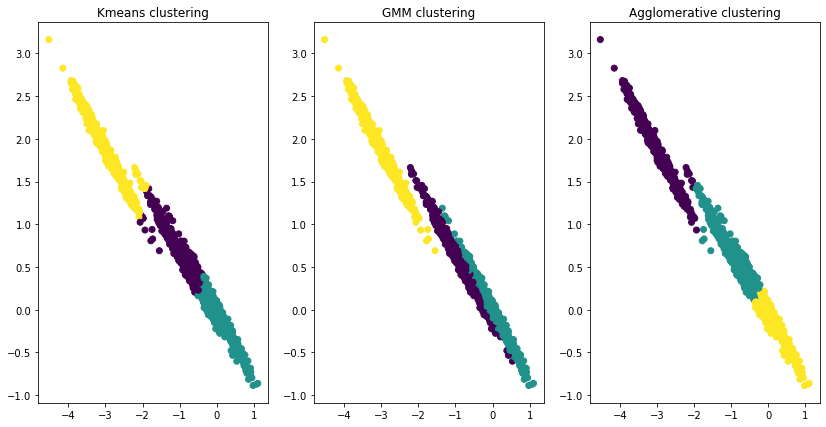

In [45]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn import mixture
from sklearn.cluster import AgglomerativeClustering


# Kmeans clustering:
# Incorrect number of clusters
clust_kmeans = KMeans(n_clusters=3, random_state=random_state).fit_predict(Xc_aniso)

# Agglomerative clustering:
clust_agg = AgglomerativeClustering(n_clusters=3).fit_predict(Xc_aniso) 


# GMM clustering:
clust_gmm = mixture.GaussianMixture(n_components=3,covariance_type='full').fit_predict(Xc_aniso)

plt.figure(figsize=(14,7))

ax0 = plt.subplot(1,3,1)
plt.scatter(Xc_aniso[:, 0], Xc_aniso[:, 1], c=clust_kmeans)
plt.title("Kmeans clustering")

ax1 = plt.subplot(1,3,2)
plt.scatter(Xc_aniso[:, 0], Xc_aniso[:, 1], c=clust_gmm)
plt.title("GMM clustering")

ax2 = plt.subplot(1,3,3)
plt.scatter(Xc_aniso[:, 0], Xc_aniso[:, 1], c=clust_agg)
plt.title("Agglomerative clustering")
plt.show()